# Flight Cancellation Prediction Model for Flyzy

## Introduction:
 Flight cancellations are a significant challenge in the aviation industry, affecting both customer satisfaction and airline profitability. Flyzy, a company dedicated to providing a seamless and hassle-free air travel experience, aims to mitigate the impact of flight cancellations through predictive modeling. By accurately predicting cancellations, Flyzy can notify customers in advance, allowing them to make alternative arrangements and reducing disruptions. Additionally, airlines can optimize their operations, improving efficiency and reducing costs associated with cancellations. This project focuses on developing a predictive model to forecast flight cancellations, ultimately supporting Flyzy's mission of enhancing the overall air travel experience for its customers and partners.

In [12]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Task: Data Checking
Before developing a predictive model for flight cancellations, it is essential to ensure the dataset is clean and reliable. This task involves conducting preliminary data analysis by checking for missing values, identifying outliers, and verifying that each column has the appropriate data type. Proper handling of these issues will lead to a more accurate and robust predictive model.

In [13]:
# Load the data
df = pd.read_csv('FlyzyFlightCancellation.csv')
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [14]:
# check missing values
missing_values = ["NA","",None,np.NaN]
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Flight ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64


There are no missing values.

In [15]:
df.corr()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
Flight ID,1.000000,-0.007541,0.006207,-0.012384,-0.025743,-0.002007,0.006172,0.043170,0.009312,-0.009101
Flight_Distance,-0.007541,1.000000,0.039727,0.024455,0.019573,0.010139,0.018413,0.042128,-0.018627,-0.277471
Scheduled_Departure_Time,0.006207,0.039727,1.000000,-0.011834,0.018319,-0.023682,-0.036318,0.040739,0.046556,-0.043733
Day_of_Week,-0.012384,0.024455,-0.011834,1.000000,-0.016790,0.020231,0.010572,0.001148,-0.011712,-0.008705
Month,-0.025743,0.019573,0.018319,-0.016790,1.000000,-0.011544,-0.006402,0.038264,-0.003430,-0.004242
Weather_Score,-0.002007,0.010139,-0.023682,0.020231,-0.011544,1.000000,-0.043096,-0.064427,-0.005269,0.305762
Previous_Flight_Delay_Minutes,0.006172,0.018413,-0.036318,0.010572,-0.006402,-0.043096,1.000000,-0.036031,-0.069502,0.302805
Airline_Rating,0.043170,0.042128,0.040739,0.001148,0.038264,-0.064427,-0.036031,1.000000,-0.021431,-0.314099
Passenger_Load,0.009312,-0.018627,0.046556,-0.011712,-0.003430,-0.005269,-0.069502,-0.021431,1.000000,-0.008320
Flight_Cancelled,-0.009101,-0.277471,-0.043733,-0.008705,-0.004242,0.305762,0.302805,-0.314099,-0.008320,1.000000


<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Flight_Distance'>

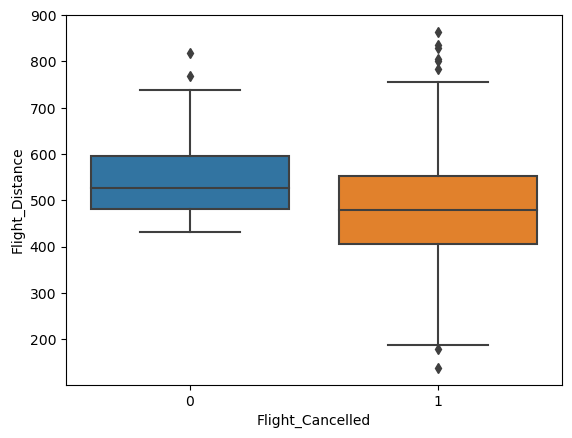

In [16]:
# identify outliers
sns.boxplot(x="Flight_Cancelled", y="Flight_Distance", data=df)

Outliers present.

<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Weather_Score'>

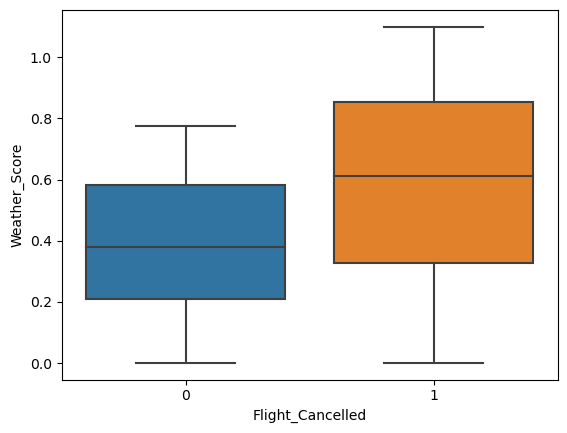

In [17]:
sns.boxplot(x="Flight_Cancelled", y="Weather_Score", data=df)

No outliers.

<AxesSubplot:xlabel='Flight_Cancelled', ylabel='Previous_Flight_Delay_Minutes'>

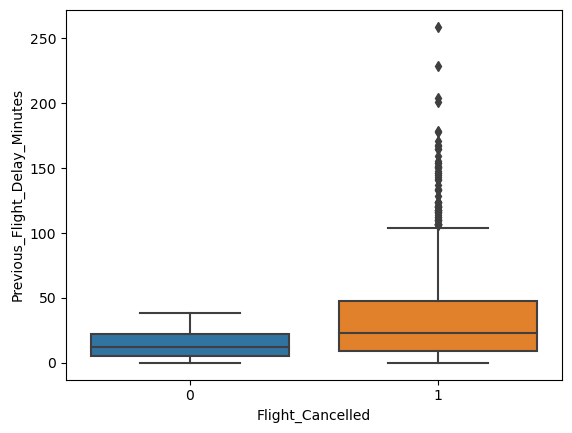

In [18]:
sns.boxplot(x="Flight_Cancelled", y="Previous_Flight_Delay_Minutes", data=df)

Outliers present.

In [19]:
# encoding categorical variables
df = pd.get_dummies(df, columns=['Airline','Origin_Airport','Destination_Airport','Airplane_Type'])
df.head()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,...,Origin_Airport_Airport 5,Destination_Airport_Airport 2,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type A,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,7319483,475,4,6,1,0.225122,5.0,2.151974,0.477202,0,...,0,1,0,0,0,0,0,1,0,0
1,4791965,538,12,1,6,0.060346,68.0,1.600779,0.159718,1,...,1,0,0,1,0,0,1,0,0,0
2,2991718,565,17,3,9,0.093920,18.0,4.406848,0.256803,0,...,0,1,0,0,0,0,0,1,0,0
3,4220106,658,1,1,8,0.656750,13.0,0.998757,0.504077,1,...,1,0,1,0,0,0,1,0,0,0
4,2263008,566,19,7,12,0.505211,4.0,3.806206,0.019638,0,...,0,1,0,0,0,0,0,0,0,1


In [20]:
# handling outliers using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(df)

In [21]:
# Convert the scaled array back to a DataFrame
df = pd.DataFrame(scaled_df, columns=df.select_dtypes(include=['float64', 'int64','uint8']).columns)
df.head()

,Flight ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,...,Origin_Airport_Airport 5,Destination_Airport_Airport 2,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type A,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,0.454577,-0.162963,-0.727273,0.50,-0.833333,-0.596128,-0.419355,0.010424,-0.079221,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.056889,0.303704,0.000000,-0.75,0.000000,-0.926796,1.612903,-0.216140,-0.708429,0.0,...,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.421185,0.503704,0.454545,-0.25,0.500000,-0.859421,0.000000,0.937271,-0.516020,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.172610,1.192593,-1.000000,-0.75,0.333333,0.270052,-0.161290,-0.463596,-0.025958,0.0,...,1.0,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.568646,0.511111,0.636364,0.75,1.000000,-0.034053,-0.451613,0.690382,-0.986048,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# check the data types
print(df.dtypes)

Flight ID                        float64
Flight_Distance                  float64
Scheduled_Departure_Time         float64
Day_of_Week                      float64
Month                            float64
Weather_Score                    float64
Previous_Flight_Delay_Minutes    float64
Airline_Rating                   float64
Passenger_Load                   float64
Flight_Cancelled                 float64
Airline_Airline A                float64
Airline_Airline B                float64
Airline_Airline C                float64
Airline_Airline D                float64
Airline_Airline E                float64
Origin_Airport_Airport 1         float64
Origin_Airport_Airport 2         float64
Origin_Airport_Airport 3         float64
Origin_Airport_Airport 4         float64
Origin_Airport_Airport 5         float64
Destination_Airport_Airport 2    float64
Destination_Airport_Airport 3    float64
Destination_Airport_Airport 4    float64
Destination_Airport_Airport 5    float64
Airplane_Type_Ty

Every Column has a correct data type.